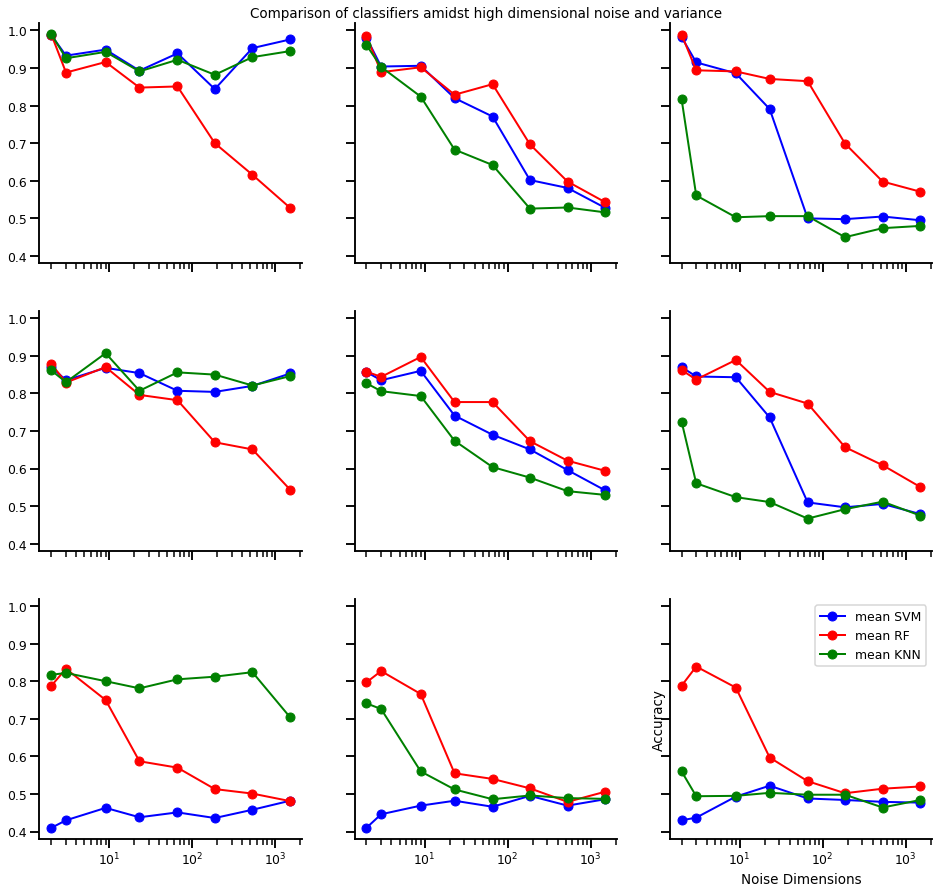

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.datasets import make_blobs, make_moons, make_circles, make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn import svm 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
import seaborn as sns
sns.set_context("talk", font_scale=0.75)

#initialize the classifiers
names = ["SVM", "Random Forest", "KNN" ]
classifiers = [
          svm.SVC(kernel='linear'), 
          RandomForestClassifier(n_estimators=50, random_state=1, max_features = 'sqrt'),
          KNeighborsClassifier(n_neighbors=3)]

#function to calculate the accuracy 
def fit_predict(train_data, test_data, train_label , test_label):
    accuracies = []
    for name, model in zip(names, classifiers):
        
        model.fit(train_data, train_label)
        score = model.score(test_data, test_label)
        accuracies.append(score)
    
    SVM_acc = accuracies[0]
    RF_acc = accuracies[1]
    KNN_acc = accuracies[2]

    return SVM_acc,RF_acc,KNN_acc

#function for taking input data, sampling noise and appending it
def add_noise(data, mu, var, dim):
    n = data.shape[0]
    noise = np.random.normal(mu, var, size = [n, dim])
    data = np.concatenate([data,noise],axis = 1)
    return data

#Function to split the data into training & testing and then calculate the accuracies respectively
def split_accuracy(train_data, train_label, size):
    X_train, X_test, y_train, y_test = train_test_split(train_data, train_label, test_size=size)
    svm_acc, rf_acc, knn_acc = fit_predict(X_train, X_test, y_train, y_test)
    return svm_acc,rf_acc, knn_acc


class point:
    def __init__(self):
        self.accS = [ [] , [] ]
        self.accR = [ [] , [] ]
        self.accK = [ [] , [] ]

class dataset:
    def __init__(self, X, Y):
        self.x = preprocessing.StandardScaler().fit_transform(X)
        self.y = Y
        self.s = [ [] for n in range(3) ]
        self.r = [ [] for n in range(3) ]
        self.k = [ [] for n in range(3) ]

noise_dims = np.geomspace(1, 1500, 8, dtype=int) #define the number of noise dimensions
size = 0.2 
n_sims = 50
var_val = [0.1, 1, 10]

pts = [ [ point() for n in range(3) ] for m in range(3) ]
fig, plots = plt.subplots(nrows=3, ncols=3, sharex=True, sharey=True, figsize=(16,15))


for d in noise_dims:

    ds = [ dataset(*make_classification(n_features=2, n_redundant=0, n_informative=2, n_clusters_per_class=1)), dataset(*make_moons(noise=0.3)), dataset(*make_circles(noise=0.2, factor=0.5)) ]

    for s in range(n_sims):

        for i in range(3):
            for j in range(3):
                sa, ra, ka = split_accuracy(add_noise(ds[i].x, 0, var_val[j], d), ds[i].y, size)

                ds[i].s[j].append(sa)
                ds[i].r[j].append(ra)
                ds[i].k[j].append(ka)

    for i in range(3):
        for j in range(3):
            pts[i][j].accS[0] += ds[i].s[j]
            pts[i][j].accS[1].append(np.mean(ds[i].s[j]))
            pts[i][j].accR[0] += ds[i].r[j]
            pts[i][j].accR[1].append(np.mean(ds[i].r[j]))
            pts[i][j].accK[0] += ds[i].k[j]
            pts[i][j].accK[1].append(np.mean(ds[i].k[j]))

for i in range(3):
    for j in range(3):
        for k in range(2):
            pts[i][j].accS[k] = np.array(pts[i][j].accS[k])
            pts[i][j].accR[k] = np.array(pts[i][j].accR[k])
            pts[i][j].accK[k] = np.array(pts[i][j].accK[k])
        #plots[i][j].scatter(noise_dims+1, pts[i][j].accS[0], s-10)
        plots[i][j].plot(noise_dims+1, pts[i][j].accS[1], color = 'blue', linewidth = 2, marker = 'o',label="mean SVM")
        #plots[i][j].scatter(noise_dims+1, pts[i][j].accR[0], s-10)
        plots[i][j].plot(noise_dims+1, pts[i][j].accR[1], color ='red', linewidth = 2, marker = 'o',label="mean RF")
        #plots[i][j].scatter(noise_dims+1, pts[i][j].accK[0], s-10)
        plots[i][j].plot(noise_dims+1, pts[i][j].accK[1], color = 'green', linewidth = 2,marker = 'o', label="mean KNN")
        
        plots[i][j].spines['right'].set_visible(False)
        plots[i][j].spines['top'].set_visible(False)
        plots[i][j].set_xscale('log')
        
plots[0][1].set_title("Comparison of classifiers amidst high dimensional noise and variance")        
plots[2][2].set_xlabel("Noise Dimensions")
plots[2][2].set_ylabel("Accuracy")
plots[2][2].legend(['mean SVM', 'mean RF', 'mean KNN'])



